In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("HeartDiseaseTrain-Test.csv")
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [4]:
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [5]:
data_dup=data.duplicated().any()
data_dup

True

In [6]:
data=data.drop_duplicates()
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [7]:
data_dup=data.duplicated().any()
data_dup

False

In [8]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
          cont_val.append(column)

In [9]:
cate_val

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia',
 'target']

In [10]:
cont_val

['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

In [11]:
data['chest_pain_type'].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [12]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
if 'target' in cate_val:
    cate_val.remove('target')
cate_val

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia']

In [14]:
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,52,125,212,168,1.0,0,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,53,140,203,155,3.1,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2,70,145,174,125,2.6,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
3,61,148,203,161,0.0,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,62,138,294,106,1.9,0,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


In [16]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [17]:
data[cont_val]=st.fit_transform(data[cont_val])
data.head()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,True,False,False,True,...,True,False,True,False,False,False,True,False,False,True
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


In [18]:
X=data.drop('target',axis=1)
X

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_Male,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,fasting_blood_sugar_Lower than 120 mg/ml,...,exercise_induced_angina_Yes,slope_Flat,slope_Upsloping,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,thalassemia_No,thalassemia_Normal,thalassemia_Reversable Defect
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,True,False,False,True,True,...,False,False,False,False,False,True,False,False,False,True
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,True,False,False,True,False,...,True,False,True,False,False,False,True,False,False,True
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,True,False,False,True,True,...,True,False,True,False,False,False,True,False,False,True
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,True,False,False,True,True,...,False,False,False,True,False,False,False,False,False,True
4,0.839089,0.364848,0.919336,-1.905464,0.739054,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.661712,-0.687083,-1.511859,0.394086,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
733,-1.153610,-1.346085,-2.041893,1.112172,-0.382092,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,False
739,-0.267966,-0.205463,0.164513,0.499898,-0.899544,True,False,False,True,True,...,True,False,False,True,False,False,False,False,False,True
843,0.506972,1.619532,0.512893,-1.074521,-0.899544,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [19]:
Y=data['target']
Y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [24]:
Y_predict1=log.predict (X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(Y_test,Y_predict1)

0.819672131147541

In [27]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predict1)) 

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



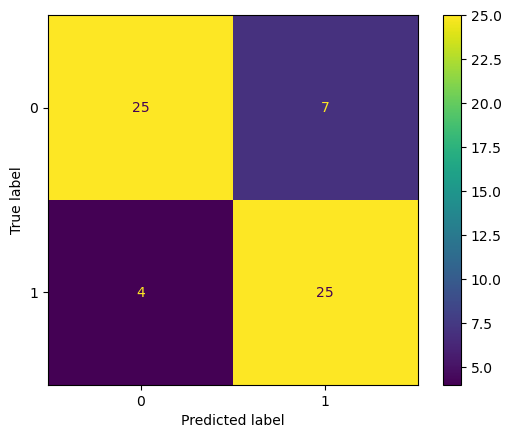

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = log.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

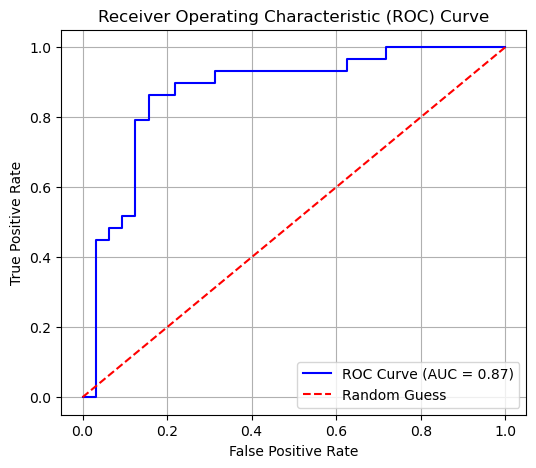

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class (1)
y_proba = log.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# Compute AUC score
auc = roc_auc_score(Y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()